<a href="https://colab.research.google.com/github/dajebbar/Diabetes-Classification/blob/main/Dabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply Different Classification Algorithms to predict the Diabetes

## Description
The objective is to predict whether the patient has diabetes or not. The dataset consists of several medical predictor (Independent variables) and one target variable.

Dataset url : https://data.world/anaozp/diabetes

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Load the dataset

In [3]:
diabetes_df = pd.read_csv('./diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis(EDA)

In [5]:
diabetes_df.shape

(768, 9)

The diabetes dataset contains 786 rows and 9 columns

- Check columns name

In [6]:
diabetes_df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

- Check the columns types

In [7]:
diabetes_df.dtypes.value_counts(dropna=False)

int64      7
float64    2
dtype: int64

All columns are numeric

- Check dataset info

In [8]:
diabetes_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We remark that dataset does not contain missing values but the type of columns take more space memory. Let's fix this.

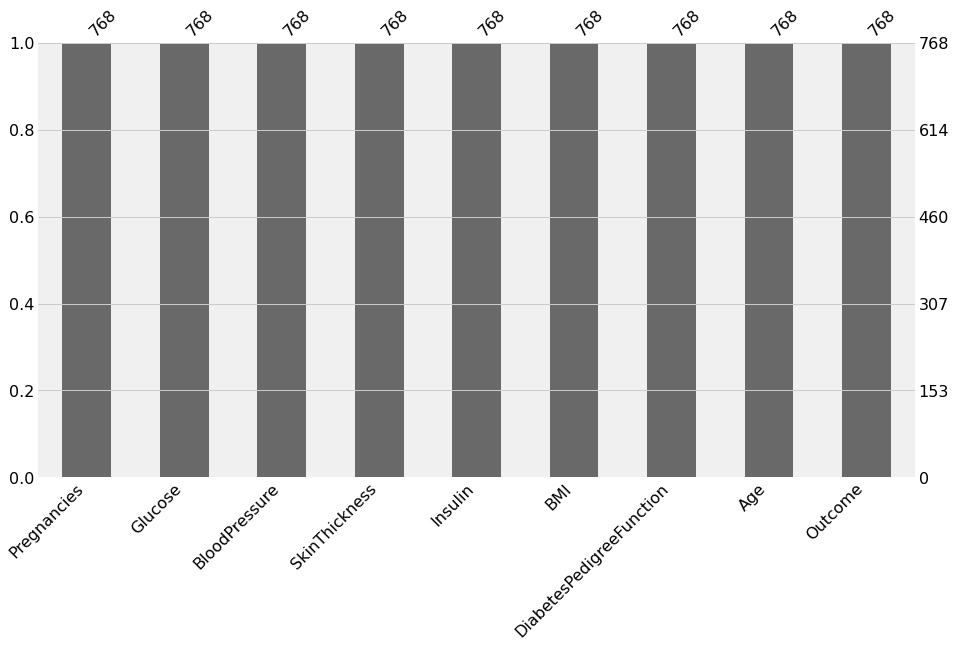

In [9]:
msno.bar(df=diabetes_df, figsize=(14,8))

In [10]:
diabetes_df = diabetes_df.assign(
    Pregnancies = diabetes_df.Pregnancies.astype(np.int8),
    Glucose = diabetes_df.Glucose.astype(np.int8),
    BloodPressure = diabetes_df.BloodPressure.astype(np.int8),
    SkinThickness = diabetes_df.SkinThickness.astype(np.int8),
    Insulin = diabetes_df.Insulin.astype(np.int8),
    BMI = diabetes_df.BMI.astype(np.float16),
    DiabetesPedigreeFunction = diabetes_df.DiabetesPedigreeFunction.astype(np.float16),
    Age = diabetes_df.Age.astype(np.int8),
    Outcome = diabetes_df.Outcome.astype(np.int8),
)

diabetes_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int8   
 1   Glucose                   768 non-null    int8   
 2   BloodPressure             768 non-null    int8   
 3   SkinThickness             768 non-null    int8   
 4   Insulin                   768 non-null    int8   
 5   BMI                       768 non-null    float16
 6   DiabetesPedigreeFunction  768 non-null    float16
 7   Age                       768 non-null    int8   
 8   Outcome                   768 non-null    int8   
dtypes: float16(2), int8(7)
memory usage: 8.4 KB
